In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [148]:
data = pd.read_csv('../data/titanic/train.csv')

In [149]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [150]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [151]:
# survived?

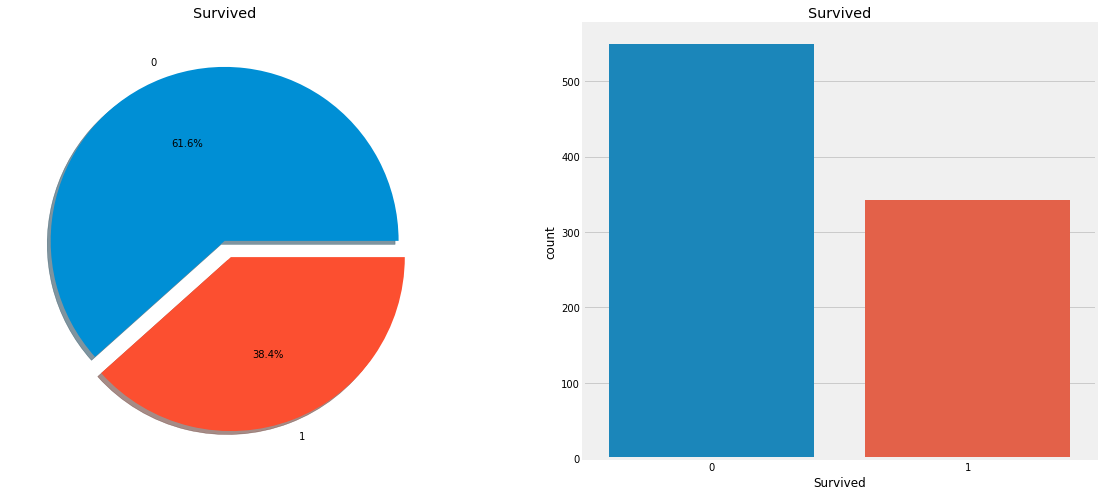

In [152]:
f,ax = plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data = data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [153]:
# analyse the features
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

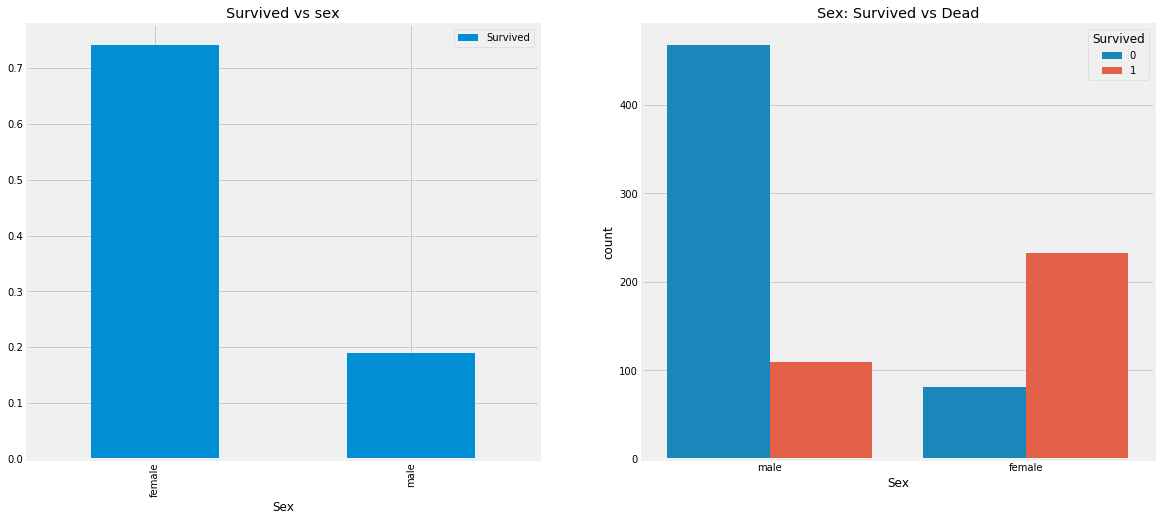

In [154]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs sex')
sns.countplot('Sex', hue='Survived', data = data, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [155]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


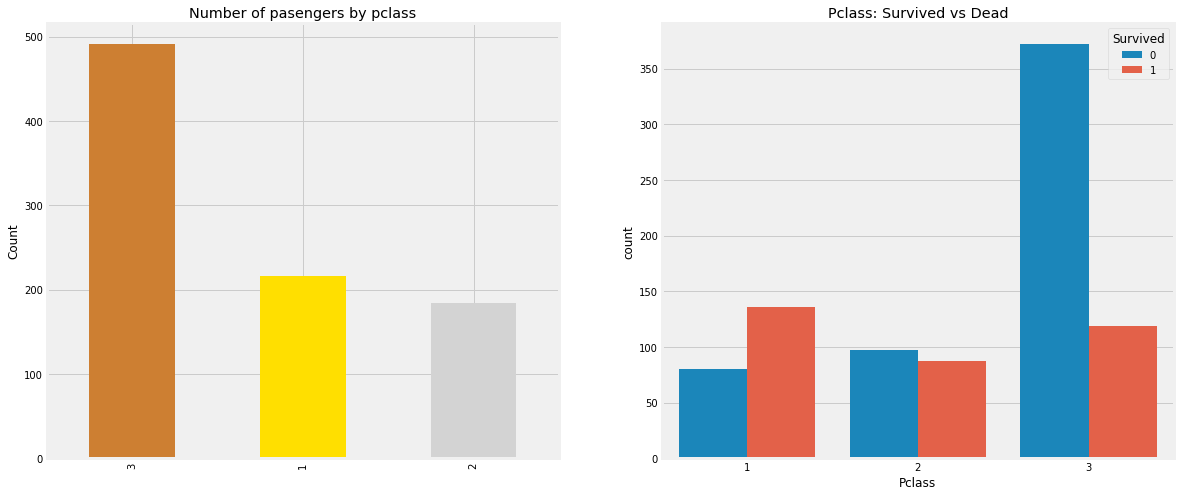

In [156]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#cd7f32','#ffdf00','#d3d3d3'], ax = ax[0])
ax[0].set_title('Number of pasengers by pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data = data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

In [157]:
pd.crosstab([data.Sex, data.Survived],data.Pclass, margins = True).style.background_gradient(cmap='summer_r')

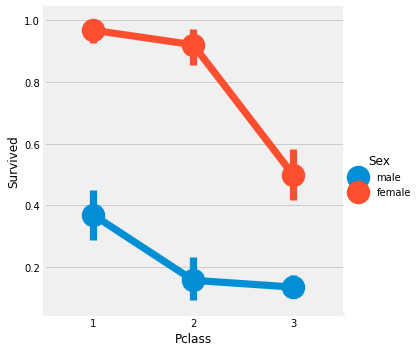

In [158]:
sns.factorplot('Pclass','Survived', hue='Sex', data=data)
plt.show()

In [159]:
print('Oldest passenger was of:', data.Age.max(),' Years')
print('Youngest passenger was of:', data.Age.min(),' Years')
print('Average age on the ship was: ', data.Age.mean(),' Years')

Oldest passenger was of: 80.0  Years
Youngest passenger was of: 0.42  Years
Average age on the ship was:  29.69911764705882  Years


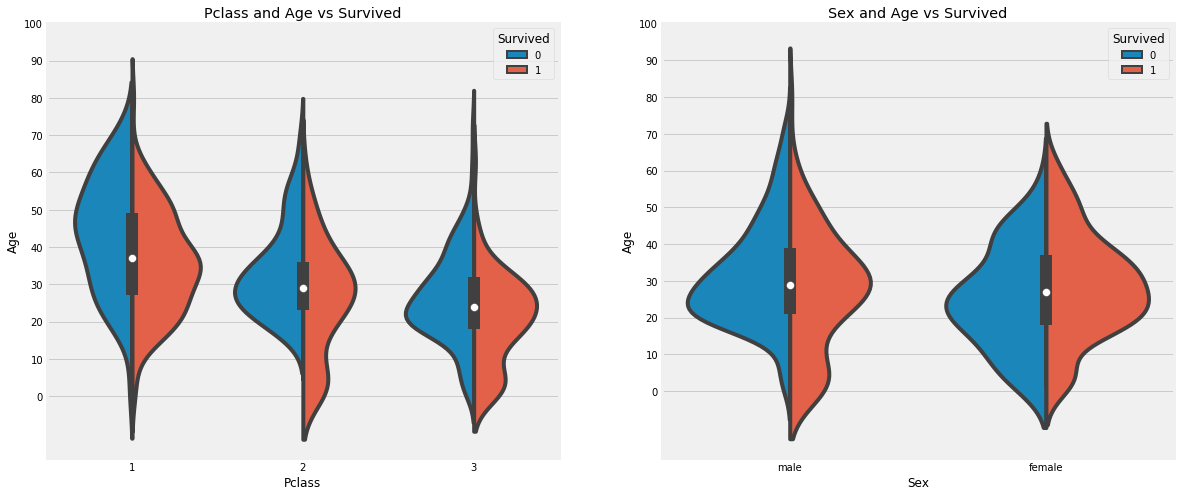

In [160]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data = data, split =True, ax=ax[0])
ax[0].set_title("Pclass and Age vs Survived")
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data = data, split = True, ax=ax[1])
ax[1].set_title("Sex and Age vs Survived")
ax[1].set_yticks(range(0,110,10))
plt.show()

In [161]:
data['Initial'] =0
for i in data:
    data['Initial']= data.Name.str.extract('([A-Za-z]+)\.')

In [162]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [163]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [164]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [165]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], inplace=True)

In [166]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [167]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [168]:
# filling NaN values with above means

data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [169]:
data.Age.isnull().any()

False

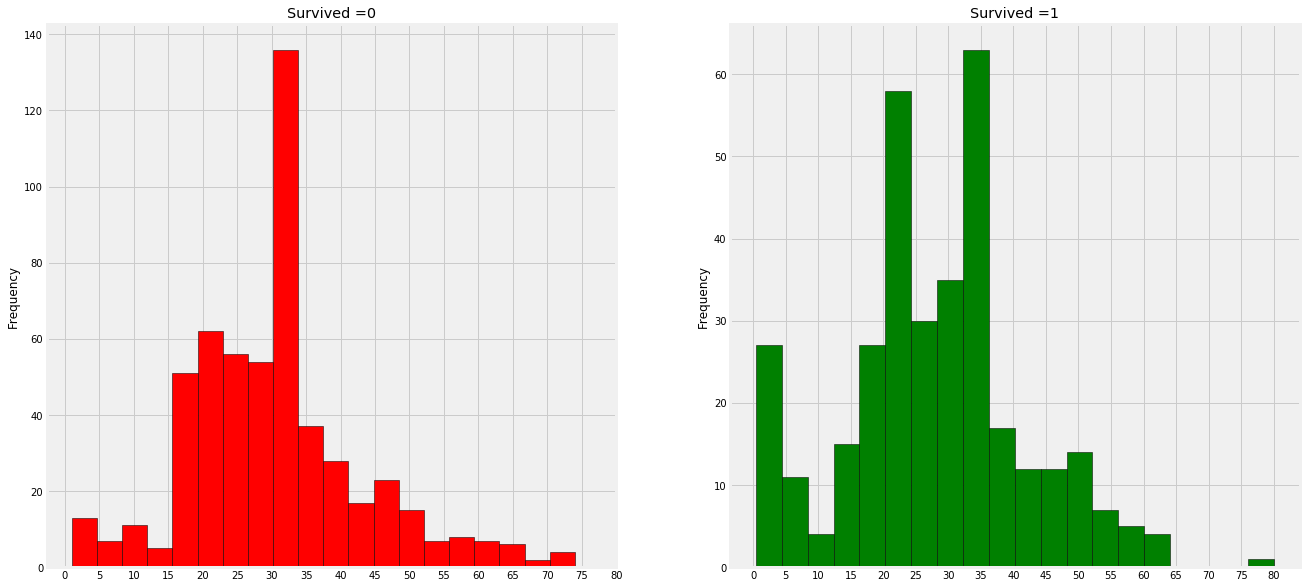

In [170]:
f, ax = plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20,edgecolor='black', color='red')
ax[0].set_title('Survived =0')
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green', bins=20,edgecolor='black')
ax[1].set_title('Survived =1')
x2=list(range(0,85, 5))
ax[1].set_xticks(x2)
plt.show()

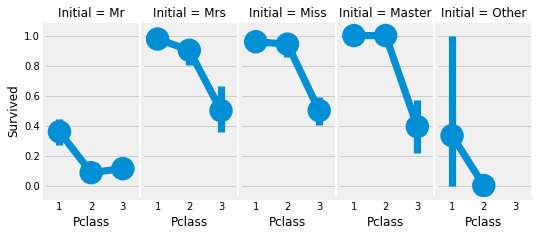

In [171]:

sns.factorplot('Pclass','Survived', col='Initial', data=data)
fig=plt.gcf()
fig.set_size_inches(7,3)
plt.show()

In [172]:
pd.crosstab([data.Embarked, data.Pclass],[data.Sex, data.Survived], margins= True).style.background_gradient(cmap='summer_r')

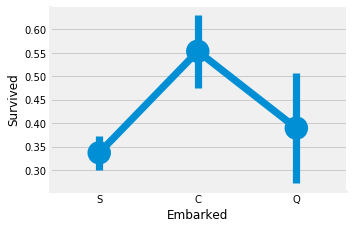

In [173]:
sns.factorplot('Embarked','Survived', data = data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

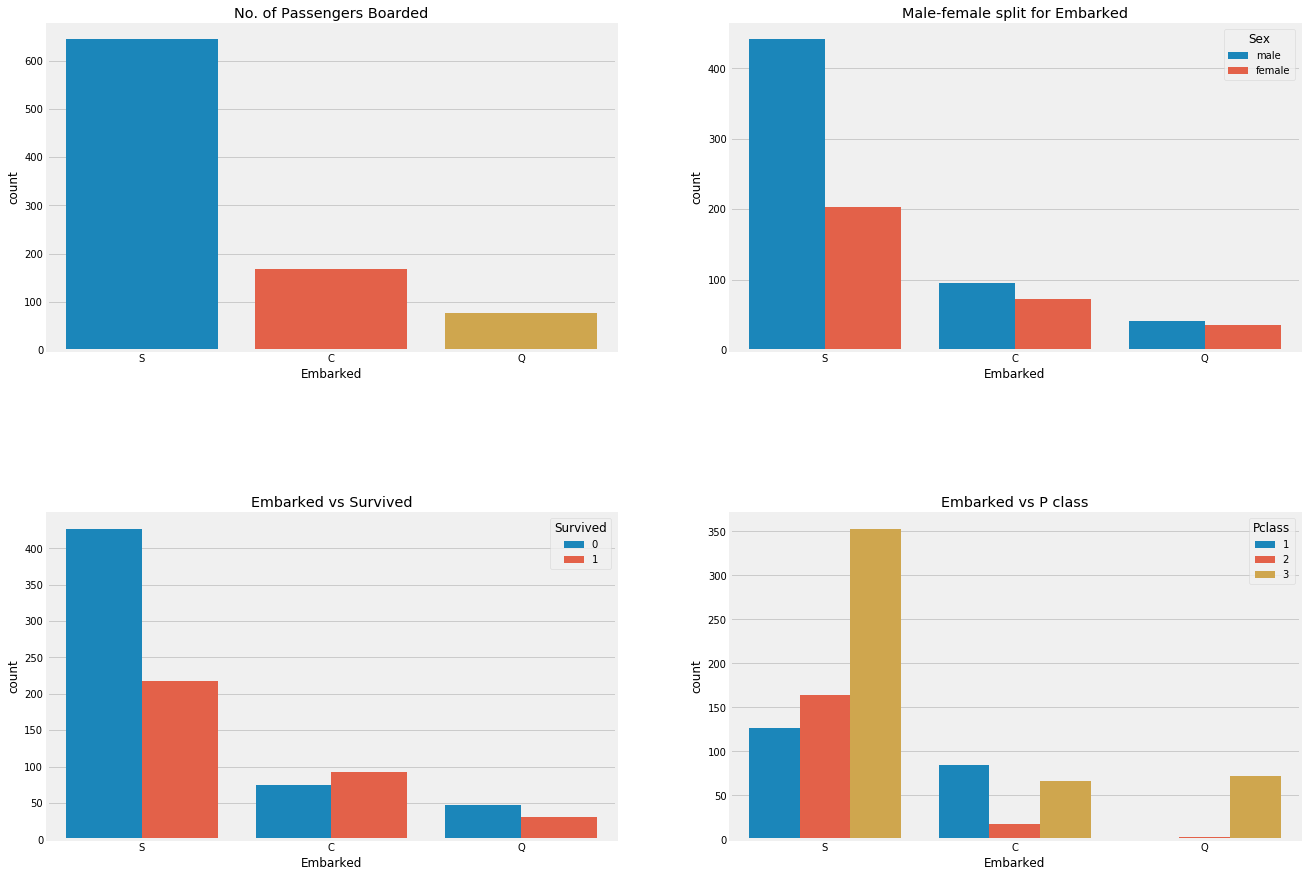

In [174]:
f, ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked', data = data,ax=ax[0,0])
ax[0,0].set_title('No. of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data = data, ax=ax[0,1])
ax[0,1].set_title('Male-female split for Embarked')
sns.countplot('Embarked', hue='Survived', data = data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data = data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs P class')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

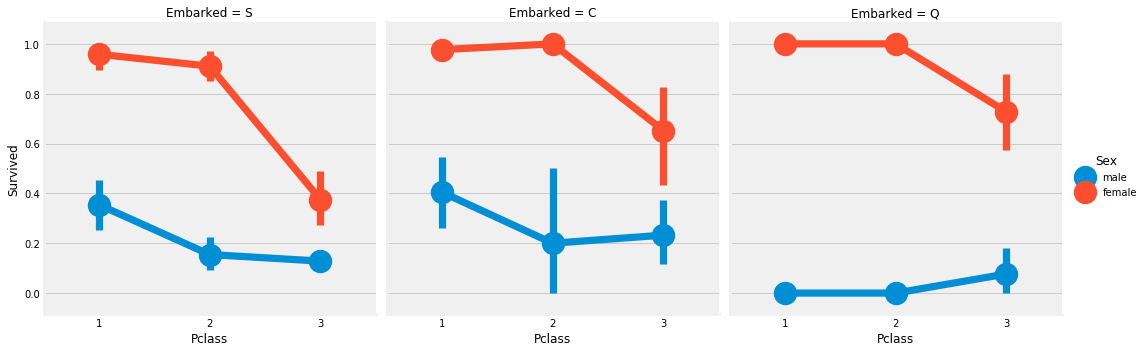

In [175]:
sns.factorplot('Pclass','Survived', hue='Sex', col='Embarked', data = data)
plt.show()

In [176]:
data['Embarked'].fillna('S',inplace= True)
data.Embarked.isnull().any()

False

In [177]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


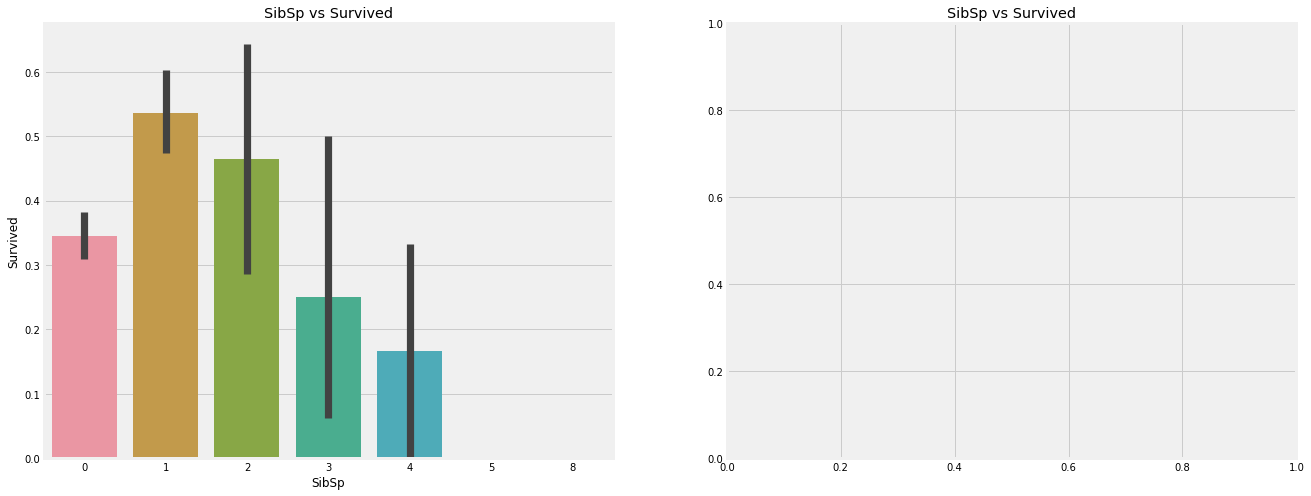

In [178]:
f, ax = plt.subplots(1,2, figsize=(20,8))
sns.barplot('SibSp','Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived', data = data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [179]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [180]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


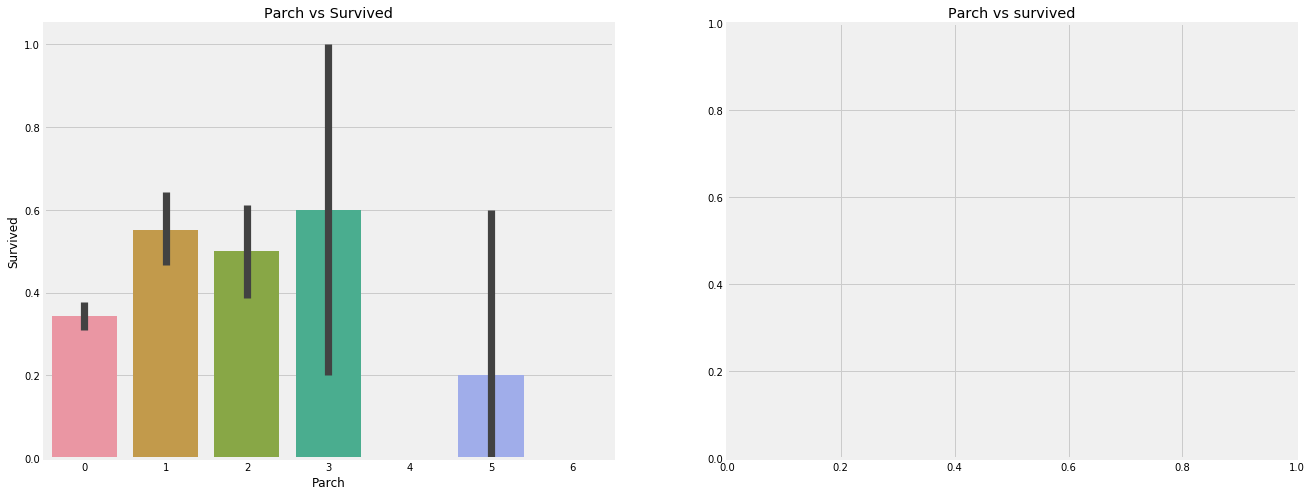

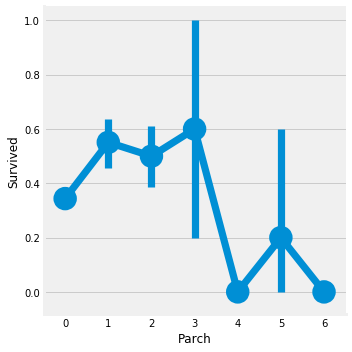

In [181]:
f, ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived', data = data, ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch', 'Survived',data = data, ax=ax[1])
ax[1].set_title('Parch vs survived')

plt.show()

Text(0.5, 1.0, 'Fares in Pclass 3')

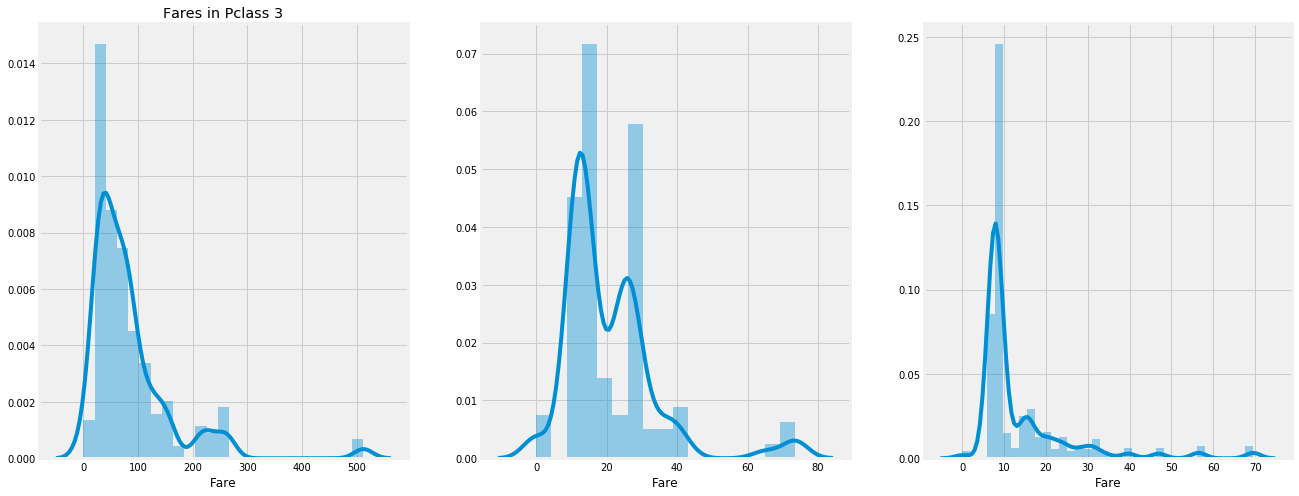

In [182]:
f, ax = plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[0].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[0].set_title('Fares in Pclass 3')

In [183]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


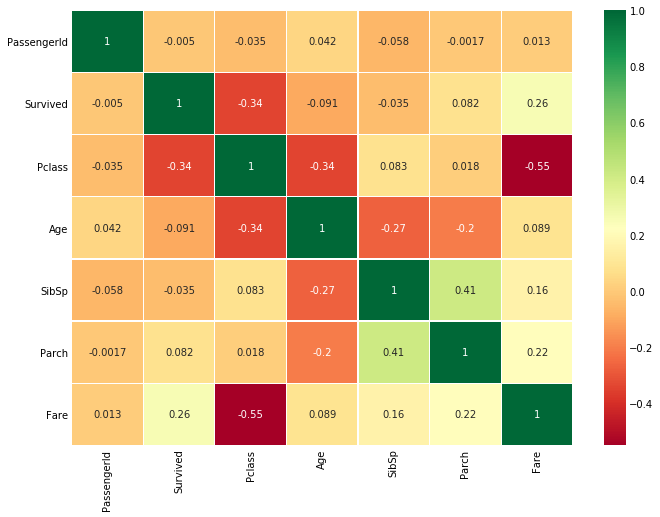

In [184]:
sns.heatmap(data.corr(),annot=True, cmap='RdYlGn', linewidths=.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [185]:
# Part2: Feature Engineering and Data Cleaning

In [186]:
data['Age_band']=0

data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[(data['Age']>64),'Age_band']=4
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [187]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


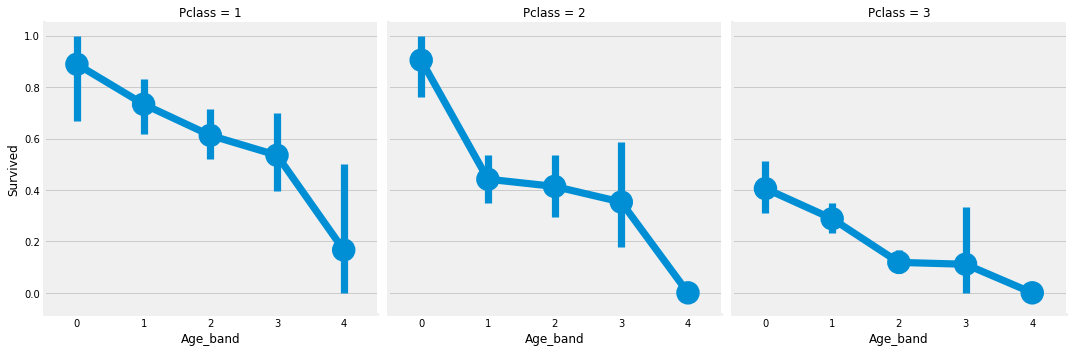

In [188]:
sns.factorplot('Age_band','Survived', data=data, col='Pclass')
plt.show()

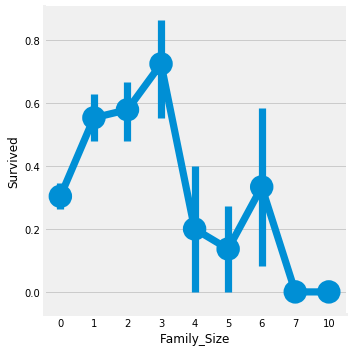

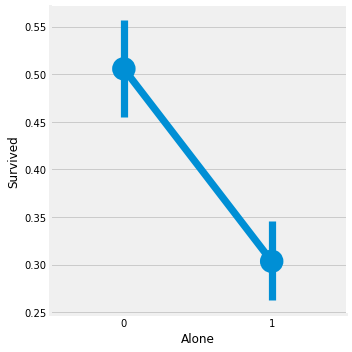

In [189]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1

f, ax= plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived', data = data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived', data = data, ax= ax[1])
ax[1].set_title('Alone vs survived')
plt.close(0)
plt.close(1)
plt.show()

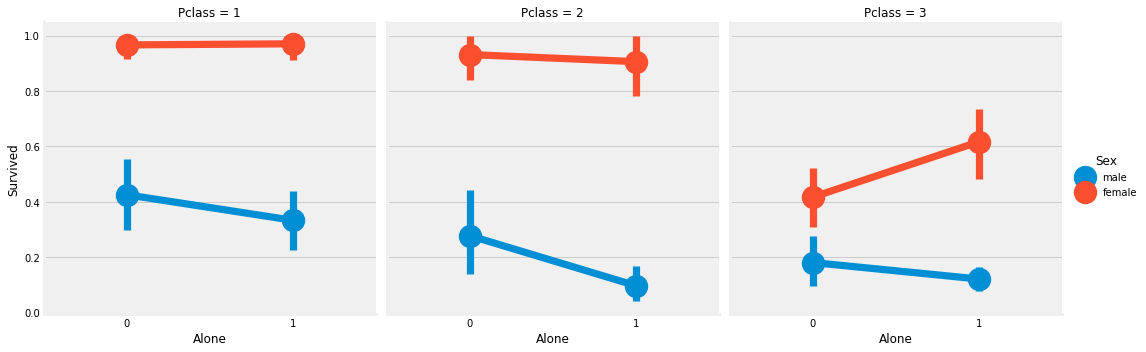

In [190]:
sns.factorplot('Alone','Survived', data = data, hue = 'Sex', col='Pclass')
plt.show()

In [191]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [192]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91) & (data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454) & (data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31) & (data['Fare']<=513),'Fare_cat']=3

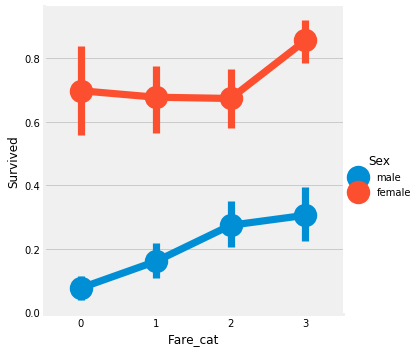

In [193]:
sns.factorplot('Fare_cat','Survived', data=data,hue='Sex')
plt.show()

In [194]:
data['Sex'].replace(['male','female'],[0,1], inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)


In [195]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'], axis=1, inplace=True)
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
0,0,3,0,1,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,2,1,0,3
2,1,3,1,0,0,0,2,1,0,1,1
3,1,1,1,1,0,0,1,2,1,0,3
4,0,3,0,0,0,0,0,2,0,1,1


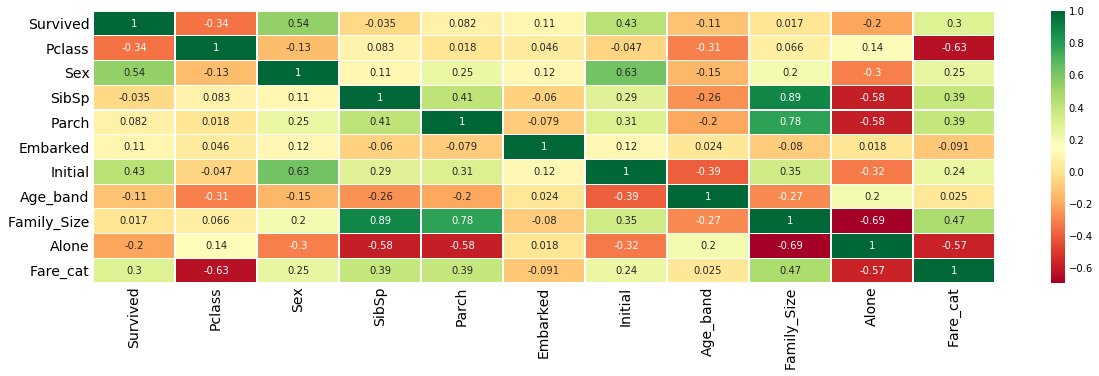

In [196]:
sns.heatmap(data=data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(18,5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [197]:
# Predictive modelling
from sklearn.linear_model import LogisticRegression
from sklearn import svm, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [198]:
train, test = train_test_split(data,test_size=0.3,random_state=0, stratify=data['Survived'])

train_X = train[train.columns[1:]]
train_Y= train[train.columns[:1]]

test_X = test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

In [199]:
# Radial Support Vector Machines(rbf-SVM)

model = svm.SVC(kernel='rbf', C=1, gamma=.1)
model.fit(train_X, train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM ', metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM  0.835820895522388


In [200]:
# linear svm

model = svm.SVC(kernel='linear', C=.1, gamma=.1)
model.fit(train_X, train_Y)
prediction2=model.predict(test_X)
print('Accuracy for rbf SVM ', metrics.accuracy_score(prediction2,test_Y))

Accuracy for rbf SVM  0.8171641791044776


In [201]:
# logistic regression
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is ',metrics.accuracy_score(prediction3, test_Y))

The accuracy of the Logistic Regression is  0.8134328358208955


In [202]:
# Decision tree
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4=model.predict(test_X)
print('Accuracy of the decision classifier is ', metrics.accuracy_score(prediction4, test_Y))

Accuracy of the decision classifier is  0.8022388059701493


In [203]:
# KNN
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('The accuracy of the KNN is ', metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is  0.832089552238806


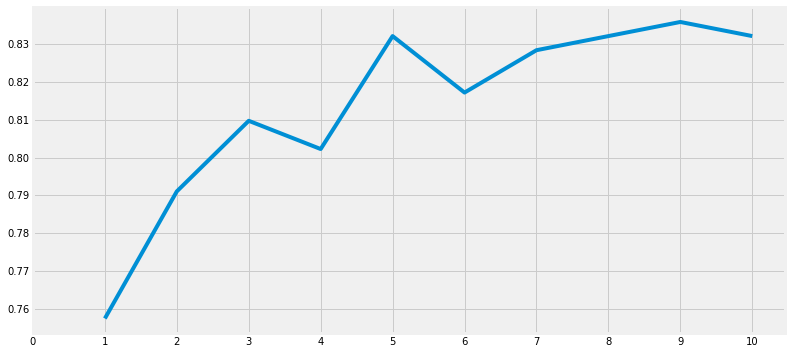

Accuracies for different values of n are:  [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] with the max value as  0.835820895522388


In [204]:
a_index = list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]

for i in a_index:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))
    
    
plt.plot(a_index,a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are: ', a.values ,'with the max value as ',a.values.max())

In [205]:
# Gaussian Naive Bayes

model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('The accuracy of the Naive Bayes is ',metrics.accuracy_score(prediction6, test_Y))

The accuracy of the Naive Bayes is  0.8134328358208955


In [206]:
# Random Forests
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('The accuracy of the Random forest is ', metrics.accuracy_score(prediction7, test_Y))

The accuracy of the Random forest is  0.8134328358208955


In [207]:
# cross validation
from sklearn.model_selection import KFold, cross_val_score,cross_val_predict

kfold = KFold(n_splits=10, random_state=22)

xyz=[]
accuracy=[]
std=[]
classifiers=['Linear svm', 'Radial svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models = [svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]

for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y,cv=kfold, scoring='accuracy')
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    
new_models_dataframe2 = pd.DataFrame({'CV Mean':xyz,'Std':std}, index = classifiers)

new_models_dataframe2

,CV Mean,Std
Linear svm,0.793471,0.047797
Radial svm,0.828290,0.034427
Logistic Regression,0.805843,0.024061
KNN,0.813783,0.041210
Decision Tree,0.808127,0.028231
Naive Bayes,0.801386,0.028999
Random Forest,0.810362,0.033249


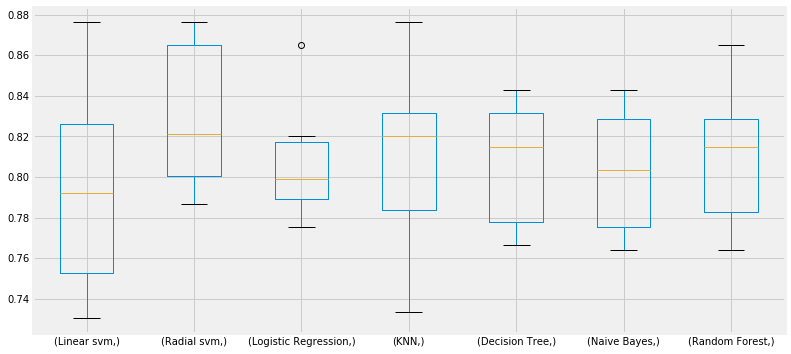

In [208]:
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

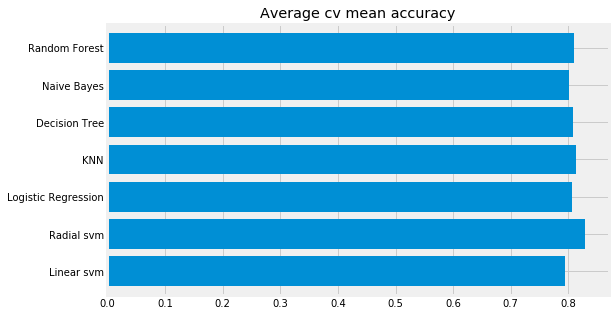

In [209]:
new_models_dataframe2['CV Mean'].plot.barh(width=.8)
plt.title('Average cv mean accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

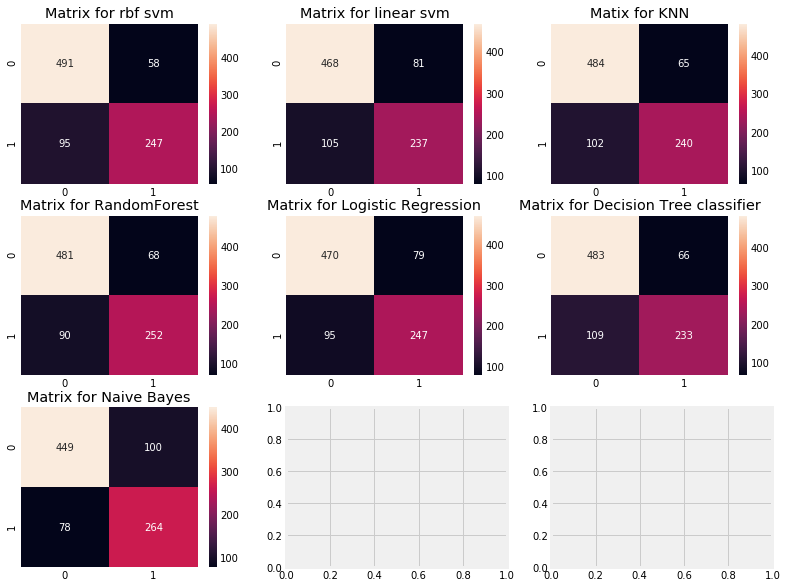

In [210]:
# confusion matrix
f,ax =plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf svm')

y_pred=cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True, fmt='2.0f')
ax[0,1].set_title('Matrix for linear svm')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True, fmt='2.0f')
ax[0,2].set_title('Matix for KNN')

y_pred= cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for RandomForest')

y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')

y_pred=cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree classifier')

y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

In [211]:
# Hyperparams Tuning of the best 2 classifiers

from sklearn.model_selection import GridSearchCV

C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

kernel = ['rbf','linear']
hyper ={'kernel': kernel,'C':C,'gamma':gamma}

gd = GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)

gd.fit(X,Y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8282593685267716
SVC(C=0.4, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   21.1s finished


In [212]:
n_estimators = range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   47.9s finished


0.819327098110602
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


In [213]:
# Ensembling
# Voting Classifier=average prediction result based on the prediction of all the submodels

from sklearn.ensemble import VotingClassifier

ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                             ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                             ('LR',LogisticRegression(C=0.05)),
                                             ('DT',DecisionTreeClassifier(random_state=0)),
                                             ('NB',GaussianNB()),
                                             ('svm',svm.SVC(kernel='linear',probability=True))],
                                 voting='soft').fit(train_X,train_Y)
print('The accuracy for the ensembled model is: ',ensemble_lin_rbf.score(test_X,test_Y))
cross = cross_val_score(ensemble_lin_rbf,X,Y,cv=10,scoring='accuracy')
print('The cross validated score is ', cross.mean())

The accuracy for the ensembled model is:  0.8208955223880597
The cross validated score is  0.8237952559300874


In [214]:
# Bagging = applying similar classifiers on small partitions of the dataset and then taking the average of all the predictions
# Bagged KNN

from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction = model.predict(test_X)
print('The accuracy of bagged KNN is ', metrics.accuracy_score(prediction,test_Y))
result = cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged knn is ', result.mean())

The accuracy of bagged KNN is  0.835820895522388
The cross validated score for bagged knn is  0.8160424469413232


In [215]:
# Bagged decision Tree

model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0,n_estimators=100)
model.fit(train_X, train_Y)
prediction=model.predict(test_X)

print('The accuracy for bagged Decision Tree is: ', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is ', result.mean())

The accuracy for bagged Decision Tree is:  0.8246268656716418
The cross validated score for bagged Decision Tree is  0.8227590511860174


In [216]:
# Boosting = uses sequential learning of classifiers. It is a step by step enhancement of a weak model

from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=200,random_state=0, learning_rate=0.1)
result= cross_val_score(ada,X,Y,cv=10, scoring='accuracy')
print('The cross validated score for adaboost is ', result.mean())

The cross validated score for adaboost is  0.8249188514357055


In [217]:
# Stochastic Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

grad = GradientBoostingClassifier(n_estimators=500, random_state=0,learning_rate=0.1)
result = cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is ',result.mean())

The cross validated score for Gradient Boosting is  0.8115230961298376


In [218]:
# XGBoost

import xgboost as xg

xgboost = xg.XGBClassifier(n_estimators=900,learning_rate=.1)
result = cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is ', result.mean())

The cross validated score for XGBoost is  0.8160299625468165


In [219]:
# Hyper-Parameter Tuning for AdaBoost
n_estimators = list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.30,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}

gd = GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8293892411022534
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=100, random_state=None)


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed: 11.7min finished


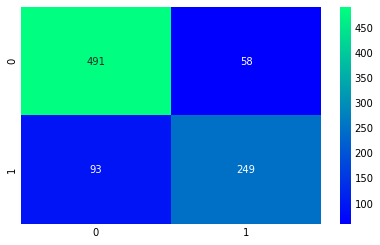

In [220]:
# confusion matrix for the best model

ada =AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result = cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y, result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

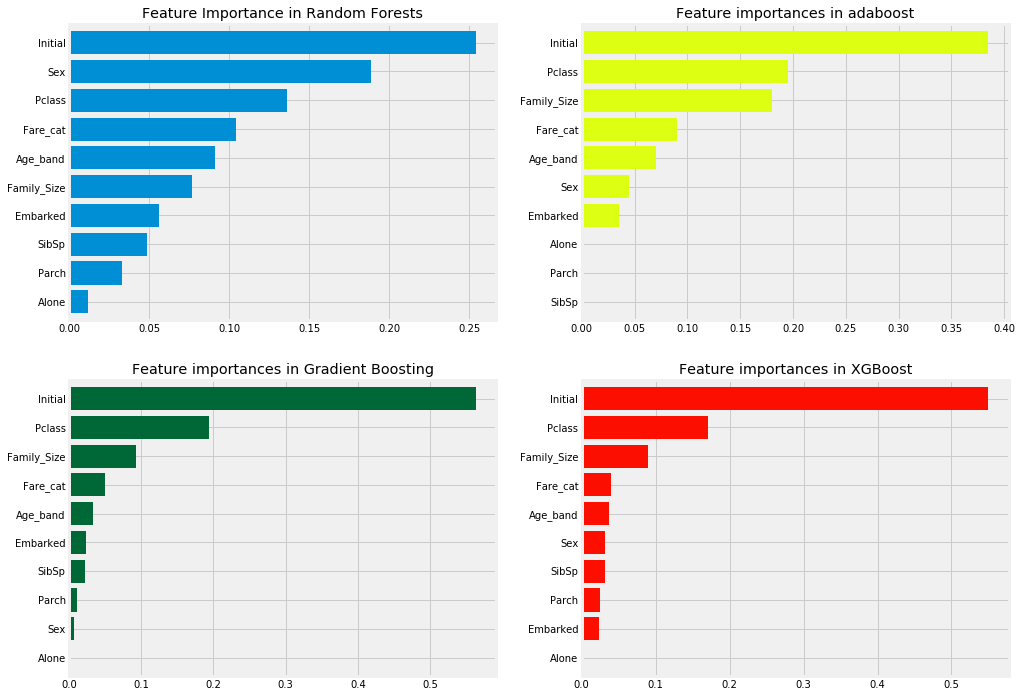

In [221]:
# feature Importance

f,ax = plt.subplots(2,2,figsize=(15,12))
model = RandomForestClassifier(n_estimators=500, random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')

model = AdaBoostClassifier(n_estimators=200, learning_rate=0.05, random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=.8, ax= ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature importances in adaboost')

model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=.8, ax= ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature importances in Gradient Boosting')

model = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=.8, ax= ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature importances in XGBoost')

plt.show()
